In [3]:
import numpy as np
import pandas as pd
from pathlib import Path

# Load data set

In [4]:
path = Path.cwd() / 'demo source files' / 'james_bond_data.csv'

In [ ]:
james_bond_data = pd.read_csv(path).convert_dtypes()
#james_bond_data.head()
james_bond_data.tail()

In [45]:
# Structure of data set
#james_bond_data.shape 
#james_bond_data.dtypes
james_bond_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Release           27 non-null     string 
 1   Movie             27 non-null     string 
 2   Bond              27 non-null     string 
 3   Bond_Car_MFG      27 non-null     string 
 4   US_Gross          27 non-null     string 
 5   World_Gross       27 non-null     string 
 6   Budget ($ 000s)   27 non-null     string 
 7   Film_Length       27 non-null     string 
 8   Avg_User_IMDB     26 non-null     Float64
 9   Avg_User_Rtn_Tom  26 non-null     Float64
 10  Martinis          27 non-null     Int64  
 11  Kills_Bond        27 non-null     Int64  
dtypes: Float64(2), Int64(2), string(8)
memory usage: 14.1 KB


In [29]:
# Creating meaningful column names 
new_column_names = {
    "Release": "release_date",
    "Movie": "movie_title",
    "Bond": "bond_actor",
    "Bond_Car_MFG": "car_manufacturer",
    "US_Gross": "income_usa",
    "World_Gross": "income_world",
    "Budget ($ 000s)": "movie_budget",
    "Film_Length": "film_length",
    "Avg_User_IMDB": "imdb",
    "Avg_User_Rtn_Tom": "rotten_tomatoes",
    "Martinis": "martinis_consumed",
    "Kills_Bond": "bond_kills",
   }
data = james_bond_data.rename(columns=new_column_names)
data.columns


Index(['release_date', 'movie_title', 'bond_actor', 'car_manufacturer',
       'income_usa', 'income_world', 'movie_budget', 'film_length', 'imdb',
       'rotten_tomatoes', 'martinis_consumed', 'bond_kills'],
      dtype='object')

# Dealing With Missing Data

In [ ]:
mask = data.isna().any(axis="columns")
mask

In [30]:
data.loc[data.isna().any(axis="columns")]

,release_date,movie_title,bond_actor,car_manufacturer,income_usa,income_world,movie_budget,film_length,imdb,rotten_tomatoes,martinis_consumed,bond_kills
10,"April, 1977",The Spy Who Loved Me,Roger Moore,Lotus,"$46,800,000.00","$185,400,000.00","$14,000.00",125 mins,<NA>,<NA>,1,31


In [33]:
foo = pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}})
foo

,imdb,rotten_tomatoes
10,7.1,6.8


In [35]:
data = james_bond_data.rename(columns=new_column_names).combine_first(pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}}))
data.loc[data.isna().any(axis="columns")]

,bond_actor,bond_kills,car_manufacturer,film_length,imdb,income_usa,income_world,martinis_consumed,movie_budget,movie_title,release_date,rotten_tomatoes


# Correcting Invalid Data Types

In [36]:
# remove $ and , in financial related columns 
data[["income_usa", "income_world", "movie_budget", "film_length"]].head()

,income_usa,income_world,movie_budget,film_length
0,"$16,067,035.00","$59,567,035.00","$1,000.00",110 mins
1,"$24,800,000.00","$78,900,000.00","$2,000.00",115 mins
2,"$51,100,000.00","$124,900,000.00","$3,000.00",110 mins
3,"$63,600,000.00","$141,200,000.00","$9,000.00",130 mins
4,"$43,100,000.00","$111,600,000.00","$9,500.00",117 mins


In [ ]:
#foo1 = data["income_usa"].replace("[$,]", "", regex=True).astype("Float64")
#foo2 = data["income_world"].replace("[$,]", "", regex=True).astype("Float64")
foo3 = data["movie_budget"].replace("[$,]", "", regex=True).astype("Float64")
foo3

In [49]:
data = (james_bond_data
        .rename(columns=new_column_names)
        .combine_first(pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}}))
        .assign(
            income_usa = lambda data: (data["income_usa"].replace("[$,]", "", regex=True)).astype("Float64"),
            income_world = lambda data: (data["income_world"].replace("[$,]", "", regex=True)).astype("Float64"),
            movie_budget = lambda data: (data["movie_budget"].replace("[$,]", "", regex=True)).astype("Float64")))

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bond_actor         27 non-null     string 
 1   bond_kills         27 non-null     Int64  
 2   car_manufacturer   27 non-null     string 
 3   film_length        27 non-null     string 
 4   imdb               27 non-null     Float64
 5   income_usa         27 non-null     Float64
 6   income_world       27 non-null     Float64
 7   martinis_consumed  27 non-null     Int64  
 8   movie_budget       27 non-null     Float64
 9   movie_title        27 non-null     string 
 10  release_date       27 non-null     string 
 11  rotten_tomatoes    27 non-null     Float64
dtypes: Float64(5), Int64(2), string(5)
memory usage: 2.9 KB


In [51]:
data["film_length"].head(3)

0    110 mins
1    115 mins
2    110 mins
Name: film_length, dtype: string

In [52]:
# remove mins from film_length
foo = data["film_length"].str.removesuffix("mins").astype("Int64")
foo.head(3)

0    110
1    115
2    110
Name: film_length, dtype: Int64

In [53]:
data = (james_bond_data
        .rename(columns=new_column_names)
        .combine_first(pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}}))
        .assign(
            income_usa = lambda data: (data["income_usa"].replace("[$,]", "", regex=True)).astype("Float64"),
            income_world = lambda data: (data["income_world"].replace("[$,]", "", regex=True)).astype("Float64"),
            movie_budget = lambda data: (data["movie_budget"].replace("[$,]", "", regex=True)).astype("Float64"),
            film_length = lambda data: (data["film_length"].str.removesuffix("mins").astype("Int64"))))

In [56]:
data['release_date'].head(3)

0      June, 1962
1    August, 1963
2       May, 1964
Name: release_date, dtype: string

In [60]:
# adjust release date as datatime type and add a new release_year column
#foo1 = pd.to_datetime(data["release_date"], format="%B, %Y")
foo2 = pd.to_datetime(data["release_date"], format="%B, %Y").dt.year.astype("Int64")
foo2.head(3)

0    1962
1    1963
2    1964
Name: release_date, dtype: Int64

In [61]:
data = (james_bond_data
        .rename(columns=new_column_names)
        .combine_first(pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}}))
        .assign(
            income_usa = lambda data: (data["income_usa"].replace("[$,]", "", regex=True)).astype("Float64"),
            income_world = lambda data: (data["income_world"].replace("[$,]", "", regex=True)).astype("Float64"),
            movie_budget = lambda data: (data["movie_budget"].replace("[$,]", "", regex=True)).astype("Float64"),
            film_length = lambda data: (data["film_length"].str.removesuffix("mins").astype("Int64")),
            release_date = lambda data: (pd.to_datetime(data["release_date"], format="%B, %Y")),
            release_year = lambda data: (pd.to_datetime(data["release_date"], format="%B, %Y").dt.year.astype("Int64"))))

In [ ]:
data.info()

# Fixing Inconsistencies in Data

In [ ]:
# movie_budget * 1,000 to make amount align
foo = data["movie_budget"].replace("[$,]", "", regex=True).astype("Float64")*1000
foo.head(3)

In [66]:
data = (james_bond_data
        .rename(columns=new_column_names)
        .combine_first(pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}}))
        .assign(
            income_usa = lambda data: (data["income_usa"].replace("[$,]", "", regex=True)).astype("Float64"),
            income_world = lambda data: (data["income_world"].replace("[$,]", "", regex=True)).astype("Float64"),
            movie_budget = lambda data: (data["movie_budget"].replace("[$,]", "", regex=True)).astype("Float64") * 1000,
            film_length = lambda data: (data["film_length"].str.removesuffix("mins").astype("Int64")),
            release_date = lambda data: (pd.to_datetime(data["release_date"], format="%B, %Y")),
            release_year = lambda data: (pd.to_datetime(data["release_date"], format="%B, %Y").dt.year.astype("Int64"))))

In [69]:
# Check spelling errors
data["bond_actor"].value_counts()

bond_actor
Roger Moore       7
Sean Connery      5
Daniel Craig      5
Pierce Brosnan    4
Timothy Dalton    3
George Lazenby    1
Shawn Connery     1
Roger MOORE       1
Name: count, dtype: Int64

In [ ]:
foo = (data["bond_actor"] 
.str.replace("Shawn", "Sean") 
.str.replace("MOORE", "Moore"))

In [24]:
data = (james_bond_data
        .rename(columns=new_column_names)
        .combine_first(pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}}))
        .assign(
            income_usa = lambda data: (data["income_usa"].replace("[$,]", "", regex=True)).astype("Float64"),
            income_world = lambda data: (data["income_world"].replace("[$,]", "", regex=True)).astype("Float64"),
            movie_budget = lambda data: (data["movie_budget"].replace("[$,]", "", regex=True)).astype("Float64") * 1000,
            film_length = lambda data: (data["film_length"].str.removesuffix("mins").astype("Int64")),
            release_date = lambda data: (pd.to_datetime(data["release_date"], format="%B, %Y")),
            release_year = lambda data: (pd.to_datetime(data["release_date"], format="%B, %Y").dt.year.astype("Int64")),
            bond_actor = lambda data: (data["bond_actor"].str.replace("Shawn", "Sean").str.replace("MOORE", "Moore"))))

In [ ]:
data['car_manufacturer'].value_counts()

In [74]:
data = (james_bond_data
        .rename(columns=new_column_names)
        .combine_first(pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}}))
        .assign(
            income_usa = lambda data: (data["income_usa"].replace("[$,]", "", regex=True)).astype("Float64"),
            income_world = lambda data: (data["income_world"].replace("[$,]", "", regex=True)).astype("Float64"),
            movie_budget = lambda data: (data["movie_budget"].replace("[$,]", "", regex=True)).astype("Float64") * 1000,
            film_length = lambda data: (data["film_length"].str.removesuffix("mins").astype("Int64")),
            release_date = lambda data: (pd.to_datetime(data["release_date"], format="%B, %Y")),
            release_year = lambda data: (pd.to_datetime(data["release_date"], format="%B, %Y").dt.year.astype("Int64")),
            bond_actor = lambda data: (data["bond_actor"].str.replace("Shawn", "Sean").str.replace("MOORE", "Moore")),
            car_manufacturer = lambda data:(data["car_manufacturer"].str.replace("Astin","Aston"))))

In [ ]:
data['car_manufacturer'].value_counts()

In [28]:
# Checking for Invalid Outliers
data[["film_length", "martinis_consumed"]].describe()

,film_length,martinis_consumed
count,27.0,27.0
mean,168.222222,0.62963
std,206.572083,1.547905
min,106.0,-6.0
25%,123.0,0.0
50%,130.0,1.0
75%,133.0,1.0
max,1200.0,3.0


In [76]:
data = (james_bond_data
        .rename(columns=new_column_names)
        .combine_first(pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}}))
        .assign(
            income_usa = lambda data: (data["income_usa"].replace("[$,]", "", regex=True)).astype("Float64"),
            income_world = lambda data: (data["income_world"].replace("[$,]", "", regex=True)).astype("Float64"),
            movie_budget = lambda data: (data["movie_budget"].replace("[$,]", "", regex=True)).astype("Float64") * 1000,
            film_length = lambda data: (data["film_length"].str.removesuffix("mins").astype("Int64")).replace(1200, 120),
            release_date = lambda data: (pd.to_datetime(data["release_date"], format="%B, %Y")),
            release_year = lambda data: (pd.to_datetime(data["release_date"], format="%B, %Y").dt.year.astype("Int64")),
            bond_actor = lambda data: (data["bond_actor"].str.replace("Shawn", "Sean").str.replace("MOORE", "Moore")),
            car_manufacturer = lambda data:(data["car_manufacturer"].str.replace("Astin","Aston")),
            martinis_consumed = lambda data:(data["martinis_consumed"].replace(-6, 6))))

# Removing Duplicate Data

In [ ]:
mask = data.duplicated(keep=False)
mask

In [30]:
data.loc[data.duplicated(keep=False)]

,bond_actor,bond_kills,car_manufacturer,film_length,imdb,income_usa,income_world,martinis_consumed,movie_budget,movie_title,release_date,rotten_tomatoes,release_year
8,Roger Moore,1,AMC,125,6.7,21000000.0,97600000.0,0,7000000.0,The Man with the Golden Gun,1974-07-01,5.1,1974
9,Roger Moore,1,AMC,125,6.7,21000000.0,97600000.0,0,7000000.0,The Man with the Golden Gun,1974-07-01,5.1,1974
15,Timothy Dalton,13,Rolls Royce,130,6.7,51185000.0,191200000.0,2,40000000.0,The Living Daylights,1987-05-01,6.3,1987
16,Timothy Dalton,13,Rolls Royce,130,6.7,51185000.0,191200000.0,2,40000000.0,The Living Daylights,1987-05-01,6.3,1987


In [78]:
data = (james_bond_data
        .rename(columns=new_column_names)
        .combine_first(pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}}))
        .assign(
            income_usa = lambda data: (data["income_usa"].replace("[$,]", "", regex=True)).astype("Float64"),
            income_world = lambda data: (data["income_world"].replace("[$,]", "", regex=True)).astype("Float64"),
            movie_budget = lambda data: (data["movie_budget"].replace("[$,]", "", regex=True)).astype("Float64") * 1000,
            film_length = lambda data: (data["film_length"].str.removesuffix("mins").astype("Int64")).replace(1200, 120),
            release_date = lambda data: (pd.to_datetime(data["release_date"], format="%B, %Y")),
            release_year = lambda data: (pd.to_datetime(data["release_date"], format="%B, %Y").dt.year.astype("Int64")),
            bond_actor = lambda data: (data["bond_actor"].str.replace("Shawn", "Sean").str.replace("MOORE", "Moore")),
            car_manufacturer = lambda data:(data["car_manufacturer"].str.replace("Astin","Aston")),
            martinis_consumed = lambda data:(data["martinis_consumed"].replace(-6, 6)))
        .drop_duplicates(ignore_index=True))

# Storing Your Cleansed Data

In [79]:
path_o = Path.cwd() / 'demo source files' / 'james_bond_data_cleansed.csv'
data.to_csv(path_o, index=False)

# Performing Data Analysis Using Python

In [80]:
# Q1: Regression analysis to see if the Rotten Tomatoes and IMDb rating sets are related.
import pandas as pd
import matplotlib.pyplot as plt
path_i = Path.cwd() / 'demo source files' / 'james_bond_data_cleansed.csv'
data = pd.read_csv(path_i).convert_dtypes()

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bond_actor         25 non-null     string 
 1   bond_kills         25 non-null     Int64  
 2   car_manufacturer   25 non-null     string 
 3   film_length        25 non-null     Int64  
 4   imdb               25 non-null     Float64
 5   income_usa         25 non-null     Int64  
 6   income_world       25 non-null     Int64  
 7   martinis_consumed  25 non-null     Int64  
 8   movie_budget       25 non-null     Int64  
 9   movie_title        25 non-null     string 
 10  release_date       25 non-null     string 
 11  rotten_tomatoes    25 non-null     Float64
 12  release_year       25 non-null     Int64  
dtypes: Float64(2), Int64(7), string(4)
memory usage: 2.9 KB


/var/folders/bg/gh3cf23s4w97s3sbk0rc8jjc0000gn/T/ipykernel_48059/4234930976.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


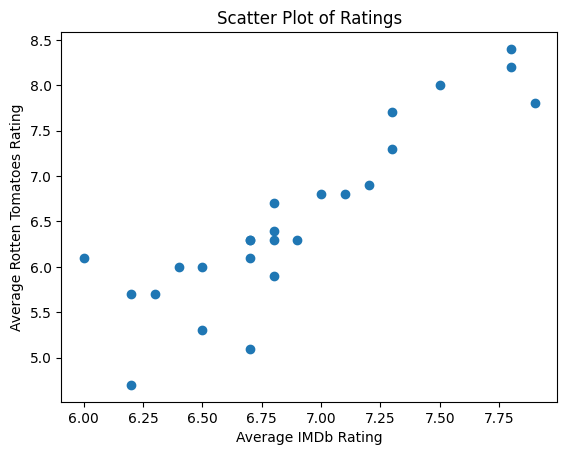

In [84]:
fig, ax = plt.subplots()
ax.scatter(data["imdb"], data["rotten_tomatoes"])
ax.set_title("Scatter Plot of Ratings")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Average Rotten Tomatoes Rating")
fig.show()

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
x = data.loc[:, ["imdb"]]
y = data.loc[:, "rotten_tomatoes"]
regr.fit(x, y)
r_squared = f"R-Squared: {regr.score(x, y):.2f}"
best_fit = f"y = {regr.coef_[0]:.4f}x{regr.intercept_:+.4f}"
y_pred = regr.predict(x)
print(r_squared)
print(best_fit)
print('y_pred: ',y_pred)
print('x: ', x)


/var/folders/bg/gh3cf23s4w97s3sbk0rc8jjc0000gn/T/ipykernel_96900/3276877428.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


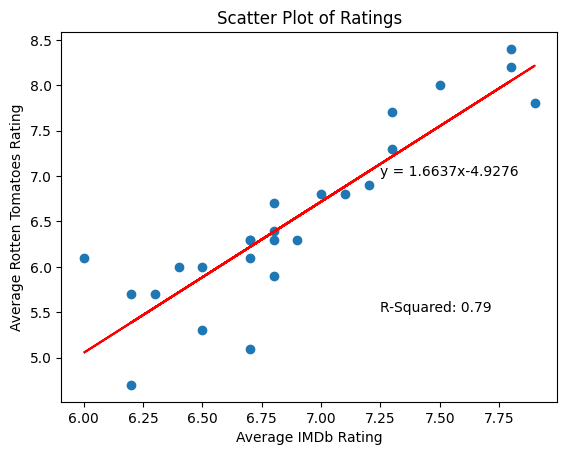

In [36]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y_pred, color="red")
ax.text(7.25, 5.5, r_squared, fontsize=10)
ax.text(7.25, 7, best_fit, fontsize=10)
ax.set_title("Scatter Plot of Ratings")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Average Rotten Tomatoes Rating")
fig.show()

In [92]:
# Q2: Are there any insights to be gleaned from analyzing the lengths of the movies?
# prepare dataset
length = data["film_length"].value_counts(bins=7).sort_index()
print(type(length))
length

<class 'pandas.core.series.Series'>


(105.942, 114.143]    3
(114.143, 122.286]    5
(122.286, 130.429]    8
(130.429, 138.571]    4
(138.571, 146.714]    3
(146.714, 154.857]    1
(154.857, 163.0]      1
Name: count, dtype: int64

/var/folders/bg/gh3cf23s4w97s3sbk0rc8jjc0000gn/T/ipykernel_48059/867927589.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


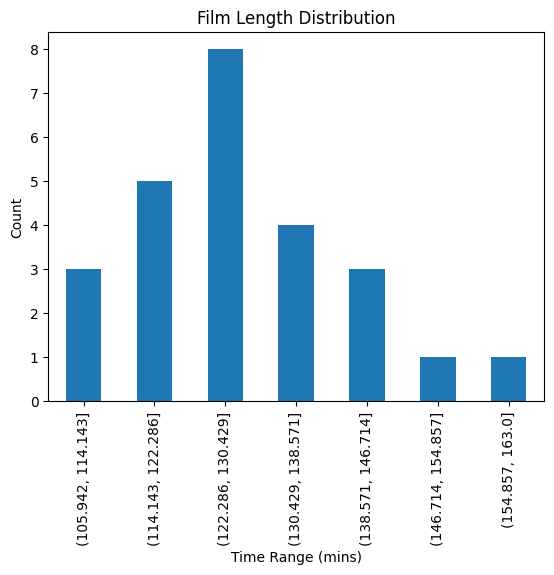

In [93]:
fig, ax = plt.subplots()
length.plot.bar(
     ax=ax,
     title="Film Length Distribution",
     xlabel="Time Range (mins)",
     ylabel="Count",
)
fig.show()

In [52]:
data["film_length"].agg(["min", "max", "mean", "std"])

min     106.000000
max     163.000000
mean    128.280000
std      12.940634
Name: film_length, dtype: float64

/var/folders/bg/gh3cf23s4w97s3sbk0rc8jjc0000gn/T/ipykernel_48059/2975264417.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


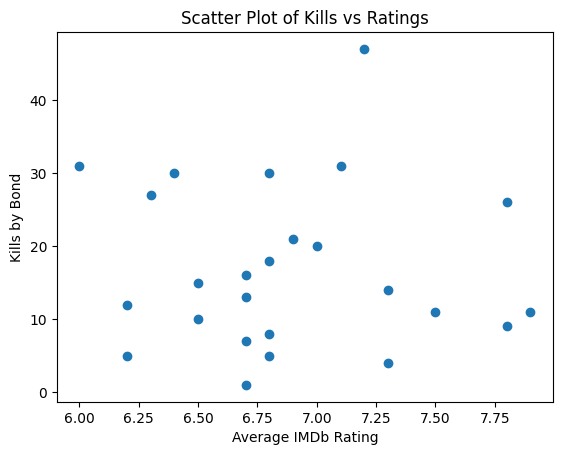

In [95]:
# Q3 Is there a relationship between the number of enemies James Bond has killed and 
# the user ratings of the movie in which they were killed?
fig, ax = plt.subplots()
ax.scatter(data["imdb"], data["bond_kills"])
ax.set_title("Scatter Plot of Kills vs Ratings")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Kills by Bond")
fig.show()

# Communicating Your Findings

In [ ]:
'''communicate your findings to other interested parties. 
After all, they’re not For Your Eyes Only. 
You could do this using a report or presentation. 
You’ll likely discuss your data sources and analysis methodology before stating your conclusions. 
Having the data and methodology behind your conclusions gives them authority. 
'''

# Conclusion

In [ ]:
# The importance of a data analysis workflow
# The purpose of the main stages in a data analysis workflow
# Common techniques for cleansing data
# How to use some common data analysis methods to meet objectives
# How to display the results of a data analysis graphically.